# **Tarea Grande 2**

## Integrantes: Manuel Espinoza, Ignacio Vial


### **Librerias**

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

Primero que todo importamos las librerias que se utilizaran.

### **Dataset**

In [17]:
!wget q- https://www.dropbox.com/s/4m8kwozpo4ut44y/flowers.csv

--2021-11-12 21:01:30--  http://q-/
Resolving q- (q-)... failed: Name or service not known.
wget: unable to resolve host address ‘q-’
--2021-11-12 21:01:30--  https://www.dropbox.com/s/4m8kwozpo4ut44y/flowers.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... failed: No route to host.
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6016:18::a27d:112|:443... failed: Cannot assign requested address.
Retrying.

--2021-11-12 21:01:31--  (try: 2)  https://www.dropbox.com/s/4m8kwozpo4ut44y/flowers.csv
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/4m8kwozpo4ut44y/flowers.csv [following]
--2021-11-12 21:01:31--  https://www.dropbox.com/s/raw/4m8kwozpo4ut44y/flowers.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 No

Luego, cargamos el dataset directo desde dropbox con el comando !wget q-

In [18]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv('/content/drive/My Drive/Universidad/Plan Comun/4to Semestre/IIC1005/Datasets/flowers.csv', sep= ",")

Debido a que sacaron el dataset de dropbox, lo descargamos y lo leemos desde Google Drive.

**Referencia:**

* https://buomsoo-kim.github.io/colab/2020/05/09/Colab-mounting-google-drive.md/

### **Parte 1:** Procesamiento de los datos

In [20]:
#df = pd.read_csv("flowers.csv", sep= ",")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314,6315,6316,6317,6318,6319,6320,6321,6322,6323,6324,6325,6326,6327,6328,6329,6330,6331,6332,6333,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343,label
0,0.000000,0.0,0.078777,0.0,0.000000,0.0,0.0,0.959512,0.396051,0.539444,0.0,0.0,0.881088,0.400309,0.000000,0.058751,0.23081,0.0,0.09793,0.073470,0.398529,0.000000,0.0,0.000000,0.165228,0.464426,1.073671,0.017675,0.089810,0.106286,0.000000,0.270185,0.000000,0.000000,0.000000,0.743026,0.0,0.00000,0.406393,0.169321,...,0.139970,0.625374,0.276260,1.470413,0.381458,0.155745,0.0,0.000000,0.0,0.367979,0.000000,0.781056,0.0,0.062550,0.0,0.000000,0.000000,0.0,0.0,0.704048,0.069275,1.307825,0.000000,0.526615,0.045950,1.439411,0.000000,0.370761,0.181276,0.0,0.0,0.289649,0.328494,0.814406,0.0,0.107592,0.022972,0.000000,0.121401,tulip
1,0.000000,0.0,0.000000,0.0,0.237838,0.0,0.0,0.093017,0.264558,0.920789,0.0,0.0,0.000000,0.400309,0.000000,0.106230,0.00000,0.0,0.00000,0.060102,0.535544,0.000000,0.0,0.103717,0.165228,0.000000,0.000000,0.002576,0.170129,0.061715,0.000000,0.752108,0.000000,0.000000,0.000000,0.628492,0.0,0.41076,0.406393,0.071372,...,0.000000,0.000000,0.138397,0.637248,0.000000,0.138590,0.0,0.000000,0.0,0.422476,0.670529,0.781056,0.0,0.110672,0.0,0.000000,0.000000,0.0,0.0,0.709380,0.135547,0.000000,0.000000,0.170083,0.000000,0.816642,0.000000,0.279565,0.417180,0.0,0.0,0.041608,0.336323,0.240113,0.0,0.519935,0.024803,0.000000,0.429721,tulip
2,0.625704,0.0,0.801589,0.0,0.224870,0.0,0.0,0.682549,0.048975,0.466645,0.0,0.0,0.000000,0.400309,0.000000,0.205675,0.00000,0.0,0.00000,0.177515,0.097839,0.371839,0.0,0.040377,0.165228,0.769132,0.676460,0.000000,0.297946,0.054401,0.189379,0.533983,0.000000,0.378692,0.146385,0.542114,0.0,0.00000,0.406393,0.184207,...,0.000000,0.181745,0.000000,0.341513,0.000000,0.037064,0.0,0.000000,0.0,1.294197,0.528932,0.781056,0.0,0.714956,0.0,0.878699,0.138336,0.0,0.0,0.631979,0.112290,0.000000,0.000000,0.000000,0.218178,0.553745,0.000000,0.251926,0.374907,0.0,0.0,0.187912,0.638451,1.114989,0.0,0.060615,0.037552,0.976862,0.185466,daisy
3,0.623410,0.0,0.000000,0.0,0.000000,0.0,0.0,0.272852,0.002523,0.038982,0.0,0.0,0.000000,0.400309,1.149994,0.103915,0.00000,0.0,0.00000,0.217926,0.158987,0.000000,0.0,0.000000,0.165228,0.890615,0.841761,0.000000,2.084171,0.014883,0.000000,0.059862,0.145074,0.000000,0.935898,0.109056,0.0,0.00000,0.406393,0.141757,...,0.000000,0.000000,0.621985,0.053385,0.000000,0.238631,0.0,0.626012,0.0,1.425908,0.287035,0.781056,0.0,0.202819,0.0,0.000000,0.000000,0.0,0.0,0.275523,0.040934,0.000000,0.242189,0.266399,0.000000,2.219329,0.000000,0.087585,0.281724,0.0,0.0,0.144354,1.084650,0.038052,0.0,0.154302,0.012609,0.268032,0.000000,dandelion
4,0.000000,0.0,2.787995,0.0,0.000000,0.0,0.0,0.316319,0.046581,0.479164,0.0,0.0,1.227279,0.400309,0.000000,0.143452,0.00000,0.0,0.00000,0.298061,0.224243,0.000000,0.0,0.000000,0.165228,1.716895,1.456905,0.000000,0.403644,0.012960,0.000000,0.486625,0.000000,0.000000,0.000000,0.299567,0.0,0.00000,0.406393,0.303441,...,0.227968,0.000000,0.120828,0.767774,0.000000,0.651707,0.0,0.000000,0.0,0.431107,0.000000,0.781056,0.0,0.224569,0.0,0.000000,0.000000,0.0,0.0,0.037502,0.340741,0.335137,0.000000,0.099934,0.000000,0.878841,0.529598,1.331456,0.131472,0.0,0.0,0.159492,0.000000,0.274653,0.0,0.706840,0.236968,0.000000,0.000000,tulip


Leemos la data con la libreria pandas y su comando read_csv, ademas denotamos que la separacion es con comas (sep=","). Podemos visualizar las primeras 5 filas con el metodo head()

In [21]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314,6315,6316,6317,6318,6319,6320,6321,6322,6323,6324,6325,6326,6327,6328,6329,6330,6331,6332,6333,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343,label
4732,0.000000,0.0,0.578682,0.000000,0.0,0.0,0.00000,0.232464,0.176939,1.297768,0.0,0.0,0.00000,0.400309,0.0,0.061652,0.000000,0.0,0.0,0.224276,0.457829,0.000000,0.0,0.000000,0.165228,0.096963,0.955979,0.0,0.790797,0.141998,0.0,1.398338,0.0,0.064910,0.0,0.938930,0.0,0.00000,0.406393,0.118398,...,0.0,0.000000,0.128592,1.199883,0.403923,0.309340,0.0,0.000000,0.000000,0.229837,0.000000,0.781056,0.0,0.187213,0.0,0.0,0.0,0.0,0.053359,0.421055,0.119674,2.137170,0.000000,0.796693,0.00000,1.174808,0.717819,1.682449,0.162550,0.0,0.0,0.180629,0.000000,0.378018,0.0,0.350704,0.013979,0.0,0.0,tulip
4733,0.588219,0.0,0.000000,0.000000,0.0,0.0,0.01182,0.192580,0.313624,0.001641,0.0,0.0,0.31947,0.400309,0.0,0.126737,0.000000,0.0,0.0,0.000000,0.295211,0.000000,0.0,0.000000,0.165228,0.000000,1.649918,0.0,0.445519,0.151398,0.0,1.131444,0.0,0.000000,0.0,0.902155,0.0,0.00000,0.406393,0.760491,...,0.0,0.190028,0.475728,0.460450,0.000000,0.789791,0.0,0.556144,0.203137,0.978208,1.299099,0.781056,0.0,0.419412,0.0,0.0,0.0,0.0,0.000000,0.261069,0.103886,0.000000,0.763454,0.253594,0.07747,0.827725,0.000000,1.179257,0.090489,0.0,0.0,0.381331,0.077894,0.196117,0.0,0.313551,0.042839,0.0,0.0,dandelion
4734,0.494115,0.0,1.088254,0.306946,0.0,0.0,0.00000,0.437063,0.092616,0.180594,0.0,0.0,0.00000,0.400309,0.0,0.525872,0.237092,0.0,0.0,0.190412,0.444854,1.197718,0.0,1.233947,0.165228,0.000000,0.000000,0.0,0.756244,0.348839,0.0,0.742617,0.0,0.405499,0.0,0.898975,0.0,1.68799,0.406393,0.082723,...,0.0,0.000000,0.216200,1.609392,0.000000,0.227339,0.0,1.090973,0.000000,0.539276,0.000000,0.781056,0.0,0.204581,0.0,0.0,0.0,0.0,0.000000,0.712131,0.567823,0.841817,0.000000,0.000000,0.00000,0.581575,0.149409,0.000000,0.670424,0.0,0.0,0.019179,0.000000,0.510766,0.0,0.043267,0.184329,0.0,0.0,sunflower
4735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4736,0.766342,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.058295,0.123551,0.530356,0.0,0.0,0.00000,0.400309,0.0,0.151682,0.000000,0.0,0.0,0.012464,0.675372,0.000000,0.0,0.000000,0.165228,1.153073,0.635474,0.0,0.005682,0.107860,0.0,0.590411,0.0,0.000000,0.0,0.174451,0.0,0.00000,0.406393,0.732105,...,0.0,0.000000,0.200820,0.015939,0.000000,0.172044,0.0,0.521289,0.000000,0.813045,0.000000,0.781056,0.0,0.240687,0.0,0.0,0.0,0.0,0.000000,0.069392,0.005346,3.434068,0.974132,1.565354,0.00000,0.581867,0.000000,1.753013,0.257863,0.0,0.0,0.134159,1.268431,2.198634,0.0,0.022650,0.026002,0.0,0.0,daisy


Al igual que antes, ahora visualizamos las ultimas 5 filas con tail()

In [22]:
print(df.shape)

(4737, 6345)


Podemos ver las dimensiones del dataframe con shape, donde nos indica que este tiene 4737 filas y 6345 columnas.

In [23]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
6340     float64
6341     float64
6342     float64
6343     float64
label     object
Length: 6345, dtype: object

Con el metodo dtypes se puede analizar que se tiene 6344 columnas de tipo float y una ultima columna de tipo object

In [24]:
df.label.describe()

count          4317
unique            5
top       dandelion
freq           1052
Name: label, dtype: object

Por ultimo se puede saber que sobre la ultima columna existen 4317 objetos, sin considerar los valores **NaN**, que existen 5 tipos de flor de las cuales **'dandelion'** es la mas repetida cuya frecuencia es de 1052.

In [25]:
pd.isna(df).sum()

0        420
1        420
2        420
3        420
4        420
        ... 
6340     420
6341     420
6342     420
6343     420
label    420
Length: 6345, dtype: int64

Ahora, procedemos a filtrar el dataframe, primero queremos analizar cuantos valores **NaN** existen por columna, y se logra mediante el metodo isna() de pandas y sum() para sumar la cantidad. Notese que existen 420 valores nulos en cada columna.

In [26]:
df.dropna(axis=0, how='any', inplace= True)
df.drop_duplicates()
print(df.shape)

(4317, 6345)


Para filtrar los valores nulos se utiliza el metodo dropna(), donde se especifica mediante axis y how que se eliminan las filas donde hayan al menos 1 valor NaN. Tambien mediante drop_duplicates se eliminan las filas repetidas en el caso de haber. Notamos que tras esto bajaron la cantidad de filas a 4317.

In [27]:
from sklearn import preprocessing

df_copy_1 = df.copy()
df_copy_1 = df_copy_1.iloc[:, 0:6344]
x = df_copy_1.to_numpy()
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)

Buscamos normalizar los datos, mediante el metodo MinMaxScaler de sklearn, debido a que este escala los valores del dataframe entre 0 y 1. Decidimos utilizar este metodo ya que comprime los datos "inliers" a un rango estrecho ( de [0, 0.005]) por lo que no es necesario verificar outliers ni features de baja varianza.

**Referencia**


*   https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/



In [28]:
df_normalized.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,6304,6305,6306,6307,6308,6309,6310,6311,6312,6313,6314,6315,6316,6317,6318,6319,6320,6321,6322,6323,6324,6325,6326,6327,6328,6329,6330,6331,6332,6333,6334,6335,6336,6337,6338,6339,6340,6341,6342,6343
0,0.000000,0.0,0.014432,0.000000,0.000000,0.0,0.0,0.318401,0.147144,0.132942,0.0,0.000000,0.192312,0.0,0.000000,0.029093,0.089633,0.000000,0.02737,0.057233,0.099472,0.00000,0.000000,0.000000,0.0,0.118423,0.141962,0.006047,0.033874,0.081340,0.000000,0.109207,0.000000,0.000000,0.000000,0.262477,0.000000,0.000000,0.0,0.069275,...,0.108691,0.035590,0.130003,0.097296,0.473411,0.112442,0.065157,0.000000,0.000000,0.0,0.100592,0.000000,0.0,0.000000,0.035239,0.000000,0.000000,0.000000,0.0,0.0,0.192048,0.038220,0.181529,0.000000,0.112386,0.014916,0.378882,0.000000,0.064613,0.043259,0.0,0.0,0.228159,0.060382,0.172615,0.0,0.041276,0.018473,0.000000,0.028800
1,0.000000,0.0,0.000000,0.000000,0.065823,0.0,0.0,0.030866,0.098291,0.226921,0.0,0.000000,0.000000,0.0,0.000000,0.052603,0.000000,0.000000,0.00000,0.046820,0.133671,0.00000,0.000000,0.027635,0.0,0.000000,0.000000,0.000881,0.064168,0.047230,0.000000,0.303999,0.000000,0.000000,0.000000,0.222017,0.000000,0.133867,0.0,0.029201,...,0.140146,0.000000,0.000000,0.048742,0.205167,0.000000,0.057980,0.000000,0.000000,0.0,0.115490,0.115347,0.0,0.000000,0.062350,0.000000,0.000000,0.000000,0.0,0.0,0.193503,0.074783,0.000000,0.000000,0.036298,0.000000,0.214943,0.000000,0.048720,0.099554,0.0,0.0,0.032775,0.061821,0.050892,0.0,0.199464,0.019946,0.000000,0.101944
2,0.147090,0.0,0.146853,0.000000,0.062234,0.0,0.0,0.226495,0.018195,0.115001,0.0,0.000000,0.000000,0.0,0.000000,0.101846,0.000000,0.000000,0.00000,0.138285,0.024420,0.10521,0.000000,0.010758,0.0,0.196119,0.089442,0.000000,0.112377,0.041633,0.044083,0.215833,0.000000,0.094234,0.051156,0.191504,0.000000,0.000000,0.0,0.075365,...,0.080084,0.000000,0.037781,0.000000,0.109953,0.000000,0.015506,0.000000,0.000000,0.0,0.353786,0.090989,0.0,0.000000,0.402789,0.000000,0.278498,0.081827,0.0,0.0,0.172390,0.061952,0.000000,0.000000,0.000000,0.070824,0.145737,0.000000,0.043903,0.089466,0.0,0.0,0.148020,0.117357,0.236325,0.0,0.023254,0.030198,0.275271,0.043999
3,0.146551,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.090542,0.000937,0.009607,0.0,0.000000,0.000000,0.0,0.368594,0.051457,0.000000,0.000000,0.00000,0.169765,0.039683,0.00000,0.000000,0.000000,0.0,0.227096,0.111298,0.000000,0.786095,0.011389,0.000000,0.024196,0.047849,0.000000,0.327063,0.038524,0.000000,0.000000,0.0,0.057998,...,0.018746,0.000000,0.000000,0.219056,0.017188,0.000000,0.099833,0.000000,0.119791,0.0,0.389791,0.049377,0.0,0.000000,0.114263,0.000000,0.000000,0.000000,0.0,0.0,0.075156,0.022584,0.000000,0.061155,0.056853,0.000000,0.584189,0.000000,0.015263,0.067229,0.0,0.0,0.113709,0.199375,0.008065,0.0,0.059195,0.010140,0.075529,0.000000
4,0.000000,0.0,0.510769,0.000000,0.000000,0.0,0.0,0.104966,0.017306,0.118086,0.0,0.000000,0.267874,0.0,0.000000,0.071035,0.000000,0.000000,0.00000,0.232191,0.055971,0.00000,0.000000,0.000000,0.0,0.437787,0.192633,0.000000,0.152244,0.009918,0.000000,0.196691,0.000000,0.000000,0.000000,0.105823,0.000000,0.000000,0.0,0.124148,...,0.105428,0.057964,0.000000,0.042554,0.247191,0.000000,0.272648,0.000000,0.000000,0.0,0.117849,0.000000,0.0,0.000000,0.126516,0.000000,0.000000,0.000000,0.0,0.0,0.010230,0.187993,0.046518,0.000000,0.021327,0.000000,0.231316,0.154039,0.232033,0.031374,0.0,0.0,0.125633,0.000000,0.058213,0.0,0.271167,0.190559,0.000000,0.000000
5,0.124992,0.0,0.103300,0.000000,0.015637,0.0,0.0,0.014916,0.209617,0.013171,0.0,0.018019,0.000000,0.0,0.000000,0.077782,0.170905,0.128266,0.00000,0.056956,0.072151,0.00000,0.024398,0.000000,0.0,0.000000,0.119949,0.000000,0.026312,0.116559,0.153658,0.078337,0.252014,0.000000,0.000000,0.090519,0.000000,0.000000,0.0,0.059127,...,0.055078,0.047301,0.293531,0.128489,0.034504,0.000000,0.054601,0.161242,0.115168,0.0,0

Se puede ver que se normalizo con exito el dataframe

In [29]:
matriz = np.matrix(df_normalized.to_numpy())
print(matriz)

[[0.         0.         0.01443223 ... 0.01847298 0.         0.02880031]
 [0.         0.         0.         ... 0.01994558 0.         0.10194411]
 [0.14709002 0.         0.14685333 ... 0.03019757 0.27527108 0.04399883]
 ...
 [0.13827805 0.         0.         ... 0.03444952 0.         0.        ]
 [0.1161562  0.         0.19937126 ... 0.1482286  0.         0.        ]
 [0.18015129 0.         0.         ... 0.0209094  0.         0.        ]]


Mediante numpy y su comando matrix() se pueden llevar los valores del dataframe a una matriz.

In [30]:
vector_labels = df['label'].to_numpy()
print(vector_labels)

['tulip' 'tulip' 'daisy' ... 'dandelion' 'sunflower' 'daisy']


Al igual que se llevan las labels a un vector.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(matriz, vector_labels, test_size = 0.2, random_state = 1)

Se importa el comando train_test_split de sklearn para separar los datos en un subset para entrenar y otro para testear los clasificadores, esto en la proporcion de 80-20. Ojo que se le agrega un random_state para poder correr el codigo varias y veces y los datos no cambien.

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3453, 6344)
(3453,)
(864, 6344)
(864,)


In [33]:
from collections import Counter


print("Training:")
dic_train = dict(Counter(y_train))
for key, value in dic_train.items():
  print(f"Número de '{key}': {value}")

print("\nTesting:")
dic_test = dict(Counter(y_test))
for key, value in dic_test.items():
  print(f"Número de '{key}': {value}")

print("\nTotal:")
dic_total = dict(Counter(vector_labels))
for key, value in dic_total.items():
  print(f"Número de '{key}': {value}")

Training:
Número de 'daisy': 610
Número de 'sunflower': 579
Número de 'tulip': 785
Número de 'rose': 628
Número de 'dandelion': 851

Testing:
Número de 'dandelion': 201
Número de 'rose': 156
Número de 'tulip': 199
Número de 'sunflower': 154
Número de 'daisy': 154

Total:
Número de 'tulip': 984
Número de 'daisy': 764
Número de 'dandelion': 1052
Número de 'sunflower': 733
Número de 'rose': 784


Se ven las proporciones de los subsets y cuantas flores quedaron en cada uno, mediante uso de la libreria Collections.

**Referencia:**

* https://www.pythonforbeginners.com/collection/python-collections-counter

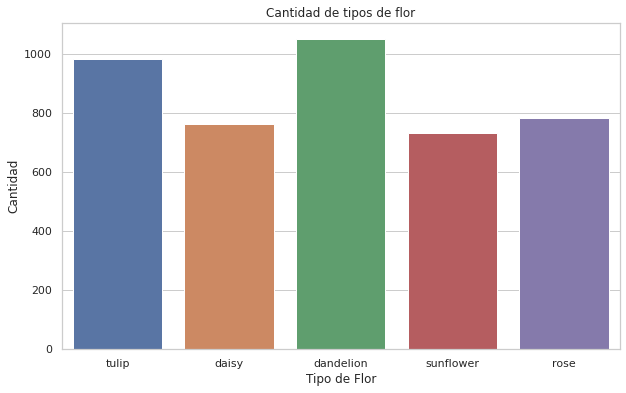

In [34]:
import matplotlib.pyplot as plt

df_num = pd.DataFrame.from_dict(dic_total, orient='index', columns=['Cantidad'])

sns.set(rc={"figure.figsize":(10, 6)})
sns.set_theme(style="whitegrid")
bar_plot = sns.barplot(x=df_num.index, y=df_num.Cantidad)
plt.xlabel("Tipo de Flor")
plt.ylabel("Cantidad")
plt.title("Cantidad de tipos de flor")

plt.show()


Se pueden graficar cuantas flores de cada tipo existen en total con un grafico de barras que se realizo con la libreria seaborn y su comando bar_plot()

**Referencia:**

* https://seaborn.pydata.org/generated/seaborn.barplot.html

### **Parte 2:** Clasificacion

En esta parte se buscan 10 clasificadores diferentes de sklearn y se realiza un fit a los datos de entrenamiento que se tienen.

In [56]:
from sklearn import svm

clasif_svm = svm.SVC(kernel = 'poly', degree=3, max_iter=-1)

clasif_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Se le cambio el kernel a uno polinomial (*'poly'*) de grado 3 sin un maximo de iteraciones.

**Referencia:**

* https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [62]:
from sklearn.tree import DecisionTreeClassifier

clasif_dec = DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_split=10)
clasif_dec.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Para este clasificador, se le ajustaron los parametros de la funcion que calcula la calidad cuando ocurre una separacion a 'entropy', la estrategia de cuando se elige la separacion en un nodo a 'best' y un minimo de separaciones a 10.


**Referencia:**

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [72]:
from sklearn.naive_bayes import GaussianNB

clasif_gnb = GaussianNB(priors=None, var_smoothing=1e-3)
clasif_gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=0.001)

Para este clasificador, se le ajustaron los parametros de 'priors' a ninguna clase en especifico y el de la varianza maxima a 1e-3.


**Referencia:**

* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [76]:
from sklearn.linear_model import LogisticRegression

clasif_log = LogisticRegression(dual=False, C=.5, penalty='l2')
clasif_log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Para este, se aumento la regularizacion de fallas con 'C', 'penalty' y 'dual'

**Referencia**

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [80]:
from sklearn.neighbors import KNeighborsClassifier

clasif_knc = KNeighborsClassifier(algorithm='auto', n_neighbors=20)
clasif_knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

En este, se aumento la cantidad n de 'neighbors' a 20, tambien, se dejo el algoritmo en auto para que este eliga el que mejor funciona con los datos que se tienen.

**Referencia:**

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clasif_qdc = QuadraticDiscriminantAnalysis()
clasif_qdc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Este clasificador se dejo con los parametros en default, ya que eran los que mejores metricas obtenian.

**Referencia:**

* https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

In [41]:
from sklearn.neural_network import MLPClassifier

clasif_mlpc = MLPClassifier(random_state=1, max_iter=300)
clasif_mlpc.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

clasif_rfc = RandomForestClassifier()
clasif_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Este clasificador se dejo con los parametros en default, ya que eran los que mejores metricas obtenian.

**Referencia:**


* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

In [43]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

clasif_gpc = GaussianProcessClassifier()
clasif_gpc.fit(X_train, y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

* https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html#sklearn.gaussian_process.GaussianProcessClassifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier

clasif_abc = AdaBoostClassifier()
clasif_abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Este clasificador se dejo con los parametros en default, ya que eran los que mejores metricas obtenian.

**Referencia:**


* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

In [45]:
clasificadores = {
    "SVM":clasif_svm, "Decision Tree":clasif_dec, "Gaussian Naive Bayes":clasif_gnb,
    "Logistic Regression":clasif_log, "K-nearest neighbor":clasif_knc, "Quadratic Discriminant Analysis":clasif_qdc,
    "Multi-layer Perceptron":clasif_mlpc, "Random forest":clasif_rfc, "Gaussian process classificatio":clasif_gpc,
    "AdaBoost":clasif_abc
                  }

## **Metricas:**

In [81]:
from sklearn.metrics import classification_report


for key, value in clasificadores.items():
  print(f"\nClasificador {key}:\n")
  print(classification_report(y_test, value.predict(X_test)))


Clasificador SVM:

              precision    recall  f1-score   support

       daisy       0.95      0.88      0.91       154
   dandelion       0.91      0.95      0.93       201
        rose       0.89      0.87      0.88       156
   sunflower       0.95      0.95      0.95       154
       tulip       0.87      0.90      0.89       199

    accuracy                           0.91       864
   macro avg       0.91      0.91      0.91       864
weighted avg       0.91      0.91      0.91       864


Clasificador Decision Tree:

              precision    recall  f1-score   support

       daisy       0.81      0.77      0.79       154
   dandelion       0.82      0.82      0.82       201
        rose       0.74      0.68      0.71       156
   sunflower       0.71      0.74      0.72       154
       tulip       0.70      0.75      0.72       199

    accuracy                           0.75       864
   macro avg       0.76      0.75      0.75       864
weighted avg       0.76    

Se puede analizar que la mayoria de los clasificadores pueden predecir bien los datos, todos alrededor de un 0.8 de precision y accurcy. Sin embargo destacan dos 'Logistic Regression' y 'SVM'. Por otro lado el 'Quadratic Discriminant' no cuadra bien con nuestros datos.

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

### **Parte 3**:  Reducción de dimensionalidad

In [47]:
 from sklearn.manifold import TSNE
 X = TSNE(n_components=2).fit_transform(matriz)
 X.shape

(4317, 2)

Se utilizo el metodo TSNE de reduccion de dimensionalidad de la libreria sklearn.

* https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [48]:
data_reducida = pd.DataFrame(X)
data_reducida['label'] = pd.Series(vector_labels, index=data_reducida.index)

In [49]:
data_reducida.head(10)

,0,1,label
0,-4.045194,-37.927513,tulip
1,31.420858,-23.279684,tulip
2,6.375128,14.583925,daisy
3,16.780649,65.077957,dandelion
4,14.615753,-47.262726,tulip
5,15.345060,-6.224654,sunflower
6,-48.773193,32.664314,daisy
7,-1.415542,19.680428,dandelion
8,-7.180087,-17.748381,tulip
9,5.459030,-41.989208,rose


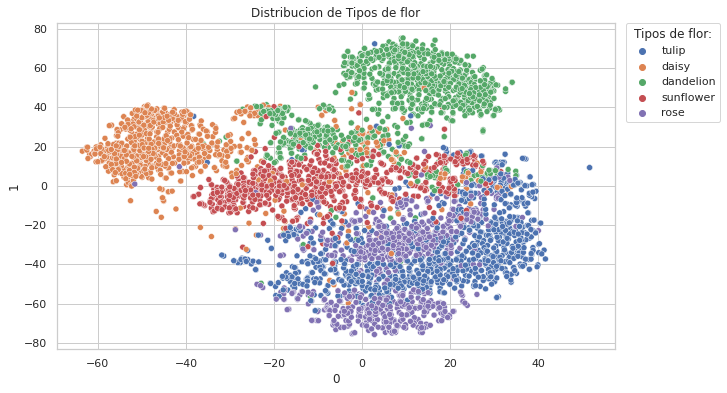

In [50]:
sns.scatterplot(data=data_reducida, x=0, y=1, hue='label')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Tipos de flor:")
plt.title("Distribucion de Tipos de flor")

plt.show()

* https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Del grafico se puede rescatar que tanto las 'daisy' como las 'dandelion' son mas distinguibles y por ende mas facil de predecir. Eso tambien se ve en las metricas de los clasificadores. Por otro lado, los 'tulip' y las 'roses' tienen caracteristicas similares que las ubican en una misma area del grafico.